In [ ]:
#default_exp models.baseline

In [ ]:
#all_func

# Baseline Models

In [ ]:
from peptide.preprocessing.data import *
from peptide.preprocessing.embedding import *

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# import xgboost as xgb
from xgboost import XGBClassifier

import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [ ]:
merged_train_df, merged_test_df = get_all_data(merge=True)
acp_train_df, acp_test_df, amp_train_df, amp_test_df, dna_bind_train_df, dna_bind_test_df = get_all_data()

In [ ]:
acp_train_df.head(5)

,sequence,label_acp
0,RRWWRRWRRW,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1


In [ ]:
acp_test_df.head(5)

,sequence,label_acp
0,FLPLLLSALPSFLCLVFKKC,0
1,DKLIGSCVWLAVNYTSNCNAECKRRGYKGGHCGSFLNVNCWCET,0
2,AVKDTYSCFIMRGKCRHECHDFEKPIGFCTKLNANCYM,0
3,GLPTCGETCFGGTCNTPGCTCDPWPVCTHN,1
4,ENCGRQAG,0


In [ ]:
acp_train_df, acp_train_features, acp_train_labels = extract_features_labels(acp_train_df)
acp_test_df, acp_test_features, acp_test_labels = extract_features_labels(acp_test_df)

## One Hot Encoding - 2 Options

### Option 1 - Learn from train data
`OneHotEncoder` with `handle_unknown='ignore'`

In [ ]:
acp_train_features

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,R,R,W,W,R,R,W,R,R,W,...,None,None,None,None,None,None,None,None,None,None
1,G,W,K,S,V,F,R,K,A,K,...,None,None,None,None,None,None,None,None,None,None
2,A,L,W,K,T,M,L,K,K,L,...,None,None,None,None,None,None,None,None,None,None
3,G,L,F,D,V,I,K,K,V,A,...,None,None,None,None,None,None,None,None,None,None
4,V,A,K,L,L,A,K,L,A,K,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,L,L,K,L,L,K,W,L,L,K,...,None,None,None,None,None,None,None,None,None,None
1374,G,F,K,D,W,I,K,G,A,A,...,None,None,None,None,None,None,None,None,None,None
1375,E,S,E,F,D,R,Q,E,Y,E,...,D,W,S,K,Y,D,N,Q,E,None
1376,F,I,S,A,I,A,S,F,L,G,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
acp_test_features

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,F,L,P,L,L,L,S,A,L,P,...,None,None,None,None,None,None,None,None,None,None
1,D,K,L,I,G,S,C,V,W,L,...,W,C,E,T,None,None,None,None,None,None
2,A,V,K,D,T,Y,S,C,F,I,...,None,None,None,None,None,None,None,None,None,None
3,G,L,P,T,C,G,E,T,C,F,...,None,None,None,None,None,None,None,None,None,None
4,E,N,C,G,R,Q,A,G,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,L,L,K,K,L,L,K,W,L,K,...,None,None,None,None,None,None,None,None,None,None
340,G,L,L,L,D,T,L,K,G,A,...,None,None,None,None,None,None,None,None,None,None
341,F,W,G,A,L,A,K,G,A,L,...,None,None,None,None,None,None,None,None,None,None
342,G,C,L,E,F,W,W,K,C,N,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
ohe1 = OneHotEncoder(handle_unknown='ignore')

x_train = ohe1.fit_transform(acp_train_features)
y_train = acp_train_labels['label_acp'].to_numpy()

In [ ]:
x_test = ohe1.transform(acp_test_features)
y_test = acp_test_labels['label_acp'].to_numpy()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1378, 1005), (1378,), (344, 1005), (344,))

**Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

**SVM**

In [ ]:
svc = LinearSVC(max_iter=10000)
svc.fit(x_train, y_train)

LinearSVC(max_iter=10000)

**XGBoost**

Examples - https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
lr_preds = lr.predict(x_test)
svc_preds = svc.predict(x_test)
xgb_preds = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import *
scores = []
for preds in [lr_preds, svc_preds, xgb_preds]:
    scores.append([accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)])

In [ ]:
pd.DataFrame(scores, columns=['acc', 'recall', 'precision', 'f1'], index=['lr', 'svc', 'xgb'])

,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.757660
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


### Option 2 - Explicitly define Amino Acids
`OneHotEncoder` with explicitly listed categories (the unique amino acids) plus a `PAD` token for filling in `None` values.

In [ ]:
import string

amino_acids = list(string.ascii_uppercase)

In [ ]:
amino_acids.append('PAD')

In [ ]:
amino_acids

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'PAD']

In [ ]:
acp_train_features.fillna('PAD')

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,R,R,W,W,R,R,W,R,R,W,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1,G,W,K,S,V,F,R,K,A,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
2,A,L,W,K,T,M,L,K,K,L,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
3,G,L,F,D,V,I,K,K,V,A,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
4,V,A,K,L,L,A,K,L,A,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,L,L,K,L,L,K,W,L,L,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1374,G,F,K,D,W,I,K,G,A,A,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1375,E,S,E,F,D,R,Q,E,Y,E,...,D,W,S,K,Y,D,N,Q,E,PAD
1376,F,I,S,A,I,A,S,F,L,G,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


In [ ]:
ohe2 = OneHotEncoder(categories = [amino_acids] * acp_train_features.shape[1])

In [ ]:
X_train = ohe2.fit_transform(acp_train_features.fillna('PAD'))
y_train = acp_train_labels['label_acp'].to_numpy()

In [ ]:
X_test = ohe2.transform(acp_test_features.fillna('PAD'))
y_test = acp_test_labels['label_acp'].to_numpy()

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)

LinearSVC(max_iter=10000)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
lr_preds = lr.predict(X_test)
svc_preds = svc.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import *
scores = []
for preds in [lr_preds, svc_preds, xgb_preds]:
    scores.append([accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)])

In [ ]:
pd.DataFrame(scores, columns=['acc', 'recall', 'precision', 'f1'], index=['lr', 'svc', 'xgb'])

,acc,recall,precision,f1
lr,0.744186,0.790698,0.723404,0.755556
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


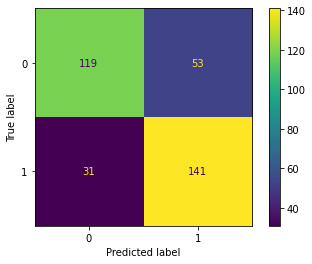

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds)
plt.show()

## Pipeline

In [ ]:
def create_pipeline(model:str, num_features:int)-> Pipeline: 
    '''Create and return pipeline'''

    preprocessor = ColumnTransformer(
        [
            ('ohe', OneHotEncoder(handle_unknown='ignore'), slice(num_features-1))     # slice indicating all cols
        ]
    )
    
    if model == 'lr':
        clf = LogisticRegression(max_iter=1000)
    elif model == 'svm':
        clf = LinearSVC(max_iter=1000)
    elif model == 'xgb':
        clf = XGBClassifier()
    else:
        raise Exception('model needs to be one of lr, svm or xgb')

    pipe = Pipeline(
        steps=[('preprocessor', preprocessor), ('classifier', clf)]
    )
    return pipe


In [ ]:
def train(model, X_train, y_train):
    model_pipeline = create_pipeline(model, len(X_train.columns))
    model_pipeline.fit(X_train, y_train)
    return model_pipeline

def predict(model_pipeline, X_test):
    preds = model_pipeline.predict(X_test)
    return preds

In [ ]:
def train_predict_allmodels(X_train, y_train, X_test):
    all_preds = []
    for model in ['lr', 'svm', 'xgb']:
        model_pipeline = train(model, X_train, y_train)
        preds = predict(model_pipeline, X_test)
        all_preds.append(preds)

    return all_preds

def get_all_scores(all_preds, y_test):
    scores = []
    for preds in all_preds:
        scores.append([accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)])
        return pd.DataFrame(scores, columns=['acc', 'recall', 'precision', 'f1'], index=['lr', 'svc', 'xgb'])

In [ ]:
# acp_train_df, acp_test_df, amp_train_df, amp_test_df, dna_bind_train_df, dna_bind_test_df

_, acp_train_features, acp_train_labels = extract_features_labels(acp_train_df)
_, acp_test_features, acp_test_labels = extract_features_labels(acp_test_df)

_, amp_train_features, amp_train_labels = extract_features_labels(amp_train_df)
_, amp_test_features, amp_test_labels = extract_features_labels(amp_test_df)

_, dna_bind_train_features, dna_bind_train_labels = extract_features_labels(dna_bind_train_df)
_, dna_bind_test_features, dna_bind_test_labels = extract_features_labels(dna_bind_test_df)

### ACP

In [ ]:
X_train, y_train = acp_train_features, acp_train_labels['label_acp'].to_numpy()
X_test, y_test = acp_test_features, acp_test_labels['label_acp'].to_numpy()

all_preds = train_predict_allmodels(X_train, y_train, X_test)
get_all_scores(all_preds, y_test)

/Users/Vinod/opt/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.75766
svc,0.747093,0.790698,0.727273,0.75766
xgb,0.747093,0.790698,0.727273,0.75766


### AMP

In [ ]:
X_train, y_train = amp_train_features, amp_train_labels['label_amp'].to_numpy()
X_test, y_test = amp_test_features, amp_test_labels['label_amp'].to_numpy()

# all_preds = train_predict_allmodels(X_train, y_train, X_test)
# get_all_scores(all_preds, y_test)

In [ ]:
model_pipeline = create_pipeline('lr', len(X_train.columns))
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  slice(None, 182, None))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
model_pipeline.

### DNA Binding

In [ ]:
X_train, y_train = dna_bind_train_features, dna_bind_train_labels['label_dna_bind'].to_numpy()
X_test, y_test = dna_bind_test_features, dna_bind_test_labels['label_dna_bind'].to_numpy()

# all_preds = train_predict_allmodels(X_train, y_train, X_test)
# get_all_scores(all_preds, y_test)

,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.757660
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.747093,0.790698,0.727273,0.757660


## GridSearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

## Automl (TPOT)

https://www.capitalone.com/tech/machine-learning/tuning-xgboost-hyperparameters/